In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
SEED = 777

In [11]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [12]:
from sklearn.preprocessing import LabelEncoder
features_target = ['target'] 

for feature in features_target:
    le = LabelEncoder()
    le.fit(train_df[feature])
    train_df[feature] = le.transform(train_df[feature])
    
print(train_df['target'].head())

0    5
1    5
2    1
3    7
4    1
Name: target, dtype: int64


In [13]:
train_no_predict = train_df.drop(['id', 'target'], 1)
train_predict = train_df['target']

train_percent = 0.80

X_train, X_test, y_train, y_test = train_test_split(train_no_predict, train_predict, stratify=train_predict, 
                                                    train_size=train_percent, random_state=SEED)
print('train count: ', len(y_train))
print('test count: ', len(y_test))

train count:  160000
test count:  40000


In [44]:
count = len(train_no_predict.columns) + 1
neighbors = [5, 25, 50, 75]
#neighbors = [5, 10]
print(neighbors)

[5, 25, 50, 75]


In [45]:
import datetime;
import time;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

cv_scores = []
for K in neighbors:
    print('starting KNN', K)
    print(datetime.datetime.now())
    start = time.time()
    
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn, X_train, y_train, cv = 2, scoring ="neg_log_loss")
    cv_scores.append(scores.mean())
    
    print(datetime.datetime.now())
    minutes = (time.time() - start) / 60
    print('minutes', minutes, '\n')

starting KNN 5
2021-06-26 17:11:36.900653
2021-06-26 17:15:14.335819
minutes 3.623919367790222 

starting KNN 25
2021-06-26 17:15:14.335954
2021-06-26 17:18:58.651698
minutes 3.738590923945109 

starting KNN 50
2021-06-26 17:18:58.651842
2021-06-26 17:22:43.097016
minutes 3.7407545407613116 

starting KNN 75
2021-06-26 17:22:43.097477
2021-06-26 17:26:29.168557
minutes 3.767852791150411 



In [48]:
print(cv_scores)

# print best K
mse = [1-x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal the best K neighbors is {}".format(optimal_k))

[-13.977068944616352, -4.117878072616625, -2.6594743996609194, -2.2486900792380515]
The optimal the best K neighbors is 75


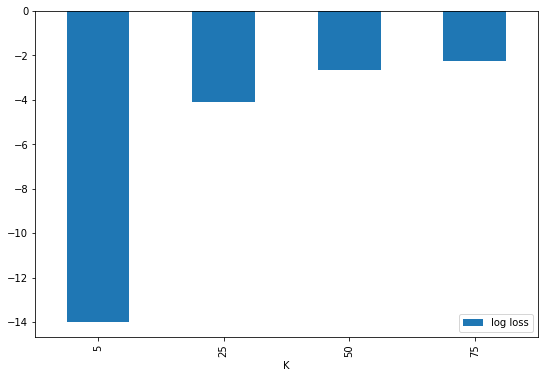

In [47]:
import matplotlib.pyplot as plt
def plot_log_loss(knn_list_scores):
    knn_list_scores = abs(knn_list_scores)
    pd.DataFrame({"K":[i for i in neighbors], "log loss":knn_list_scores}).set_index("K").plot.bar()
    plt.show()
    
plot_accuracy(cv_scores)

In [15]:
pred = knn.predict_proba(X_test)

In [17]:
from sklearn.metrics import log_loss
log_loss(y_test, pred)

18.536621253269875